# Regression Task 

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# variable information 
print(student_performance.variables) 

          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

In [2]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import plotly.express as px
import plotly.graph_objects as go
import statsmodels
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# Feature Engineering

In [4]:
y.head()

G1  G2  G3
0   0  11  11
1   9  11  11
2  12  13  12
3  14  14  14
4  11  13  13

In [5]:
y['average_grade'] = y[['G1', 'G2', 'G3']].mean(axis=1)
y

G1  G2  G3  average_grade
0     0  11  11       7.333333
1     9  11  11      10.333333
2    12  13  12      12.333333
3    14  14  14      14.000000
4    11  13  13      12.333333
..   ..  ..  ..            ...
644  10  11  10      10.333333
645  15  15  16      15.333333
646  11  12   9      10.666667
647  10  10  10      10.000000
648  10  11  11      10.666667

[649 rows x 4 columns]

In [6]:
df = pd.concat([X, y["average_grade"]], axis=1)  # Concatenating along columns
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0       no       no       4         3      4    1    1      3        4   
1      yes       no       5         3      3    1    1      3        2   
2      yes       no       4         3      2    2    3      3        6   
3      yes      yes       3         2      2    1    1      5        0   
4       no       no       4         3      2    1    2      5        0   

  average_grade  
0      7.333333  
1     10.333333  
2     12.333333  
3     14.000000  
4     12.333333  

[5 rows x 31 columns]

In [7]:
#Convert string categorical columns to integers

encoder = LabelEncoder()

# Apply LabelEncoder to each categorical string column
for column in df.columns:
    if df[column].dtype == 'object':  # Only apply to object type columns
        df[column] = encoder.fit_transform(df[column])

df.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  \
0         0         0       4         3      4     1     1       3         4   
1         1         0       5         3      3     1     1       3         2   
2         1         0       4         3      2     2     3       3         6   
3         1         1       3         2      2     1     1       5         0   
4         0         0       4         3      2     1     2       5         0   

   average_grade  
0       7.333333  
1      10.333333  
2      12.333333  
3      14.000000  
4      12.333333  

[5 rows x 31 columns]

In [8]:
df.isnull().sum()

school           0
sex              0
age              0
address          0
famsize          0
Pstatus          0
Medu             0
Fedu             0
Mjob             0
Fjob             0
reason           0
guardian         0
traveltime       0
studytime        0
failures         0
schoolsup        0
famsup           0
paid             0
activities       0
nursery          0
higher           0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
Dalc             0
Walc             0
health           0
absences         0
average_grade    0
dtype: int64

In [9]:
# Manually create 10 subsamples of 50 each
subsample1 = df.sample(n=50, random_state=1)
subsample2 = df.sample(n=50, random_state=2)
subsample3 = df.sample(n=50, random_state=3)
subsample4 = df.sample(n=50, random_state=4)
subsample5 = df.sample(n=50, random_state=5)
subsample6 = df.sample(n=50, random_state=6)
subsample7 = df.sample(n=50, random_state=7)
subsample8 = df.sample(n=50, random_state=8)
subsample9 = df.sample(n=50, random_state=9)
subsample10 = df.sample(n=50, random_state=10)

# Correlation plot for 1 and 10 Subsamples

## Subsample 1

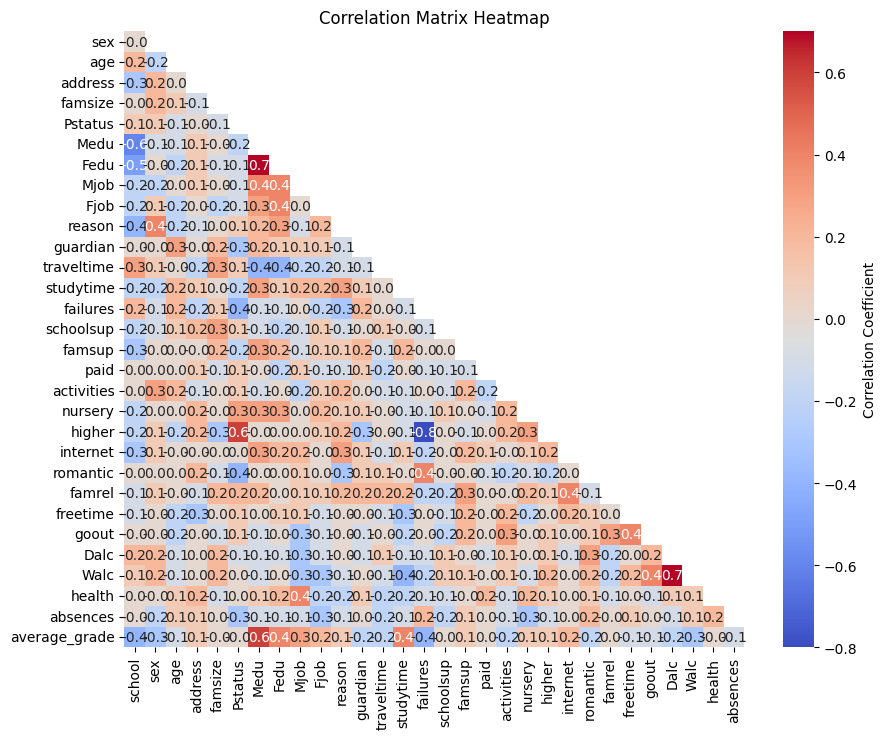

In [13]:
df_corr = subsample1.corr().round(1)  
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Apply the mask to the correlation matrix and then drop rows and columns with all NaN values
df_corr_viz = df_corr.mask(mask)
df_corr_viz = df_corr_viz.dropna(axis=0, how='all')
df_corr_viz = df_corr_viz.dropna(axis=1, how='all')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr_viz, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap')
plt.show()

## Subsample 10

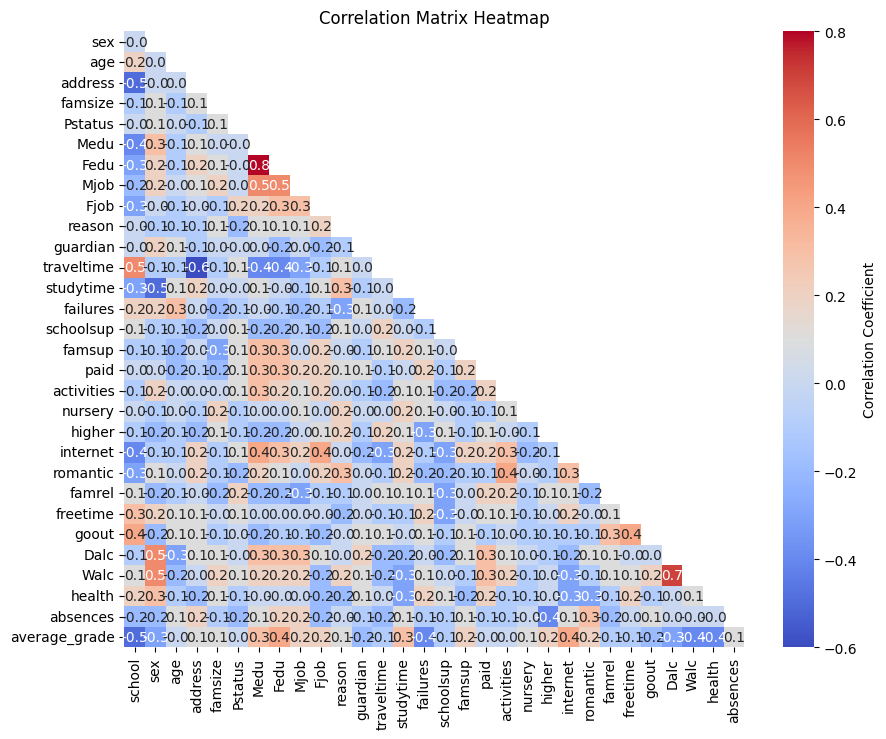

In [27]:
df_corr = subsample10.corr().round(1)  
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Apply the mask to the correlation matrix and then drop rows and columns with all NaN values
df_corr_viz = df_corr.mask(mask)
df_corr_viz = df_corr_viz.dropna(axis=0, how='all')
df_corr_viz = df_corr_viz.dropna(axis=1, how='all')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr_viz, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Distribution plot for Regression

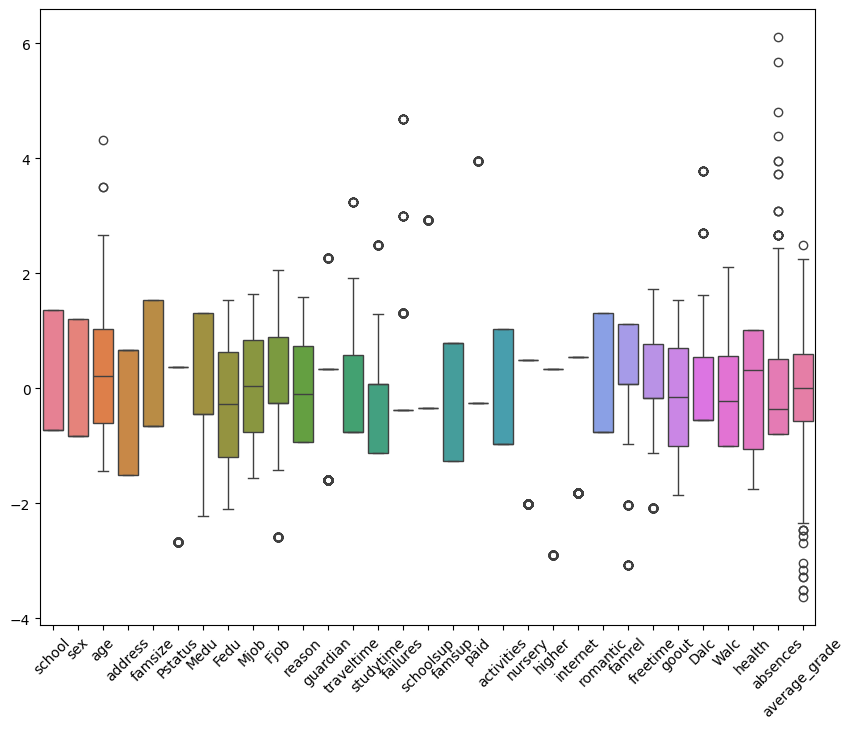

In [25]:
# Assuming 'numeric_df' is your DataFrame with numerical data
# Standardize the DataFrame
standard = (numeric_df - numeric_df.mean()) / numeric_df.std()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a box plot
sns_boxplot = sns.boxplot(data=standard)
sns_boxplot.set_xticklabels(sns_boxplot.get_xticklabels(), rotation=45)  # Rotate x labels for better visibility

plt.show()

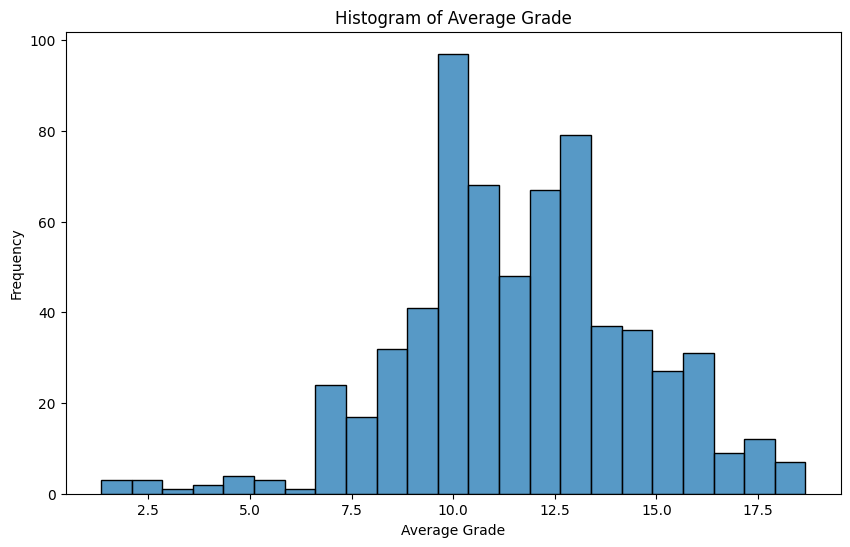

In [26]:
# Assuming 'df' is your DataFrame and it includes 'average_grade'
plt.figure(figsize=(10, 6))
sns.histplot(df['average_grade'], kde=False)  # kde=False if you do not want the Kernel Density Estimate overlay
plt.title('Histogram of Average Grade')
plt.xlabel('Average Grade')
plt.ylabel('Frequency')
plt.show()

# Pairplot for 1 and 10 subsamples

In [13]:
# Calculate the number of columns to be considered (excluding 'average_grade')
n_cols = len(df.columns) - 1  # assuming 'average_grade' is in df

# Calculate the indices to split the columns into three groups
group_size = n_cols // 3
remainder = n_cols % 3

# Define the column indices for each group, adjusting for any remainder
group1_end = group_size + (remainder > 0)  # add one more column to the first group if remainder exists
group2_end = group1_end + group_size + (remainder > 1)  # add one more column to the second group if needed

## Subsample 1

Note: Split to 3 cause there are a lot of features

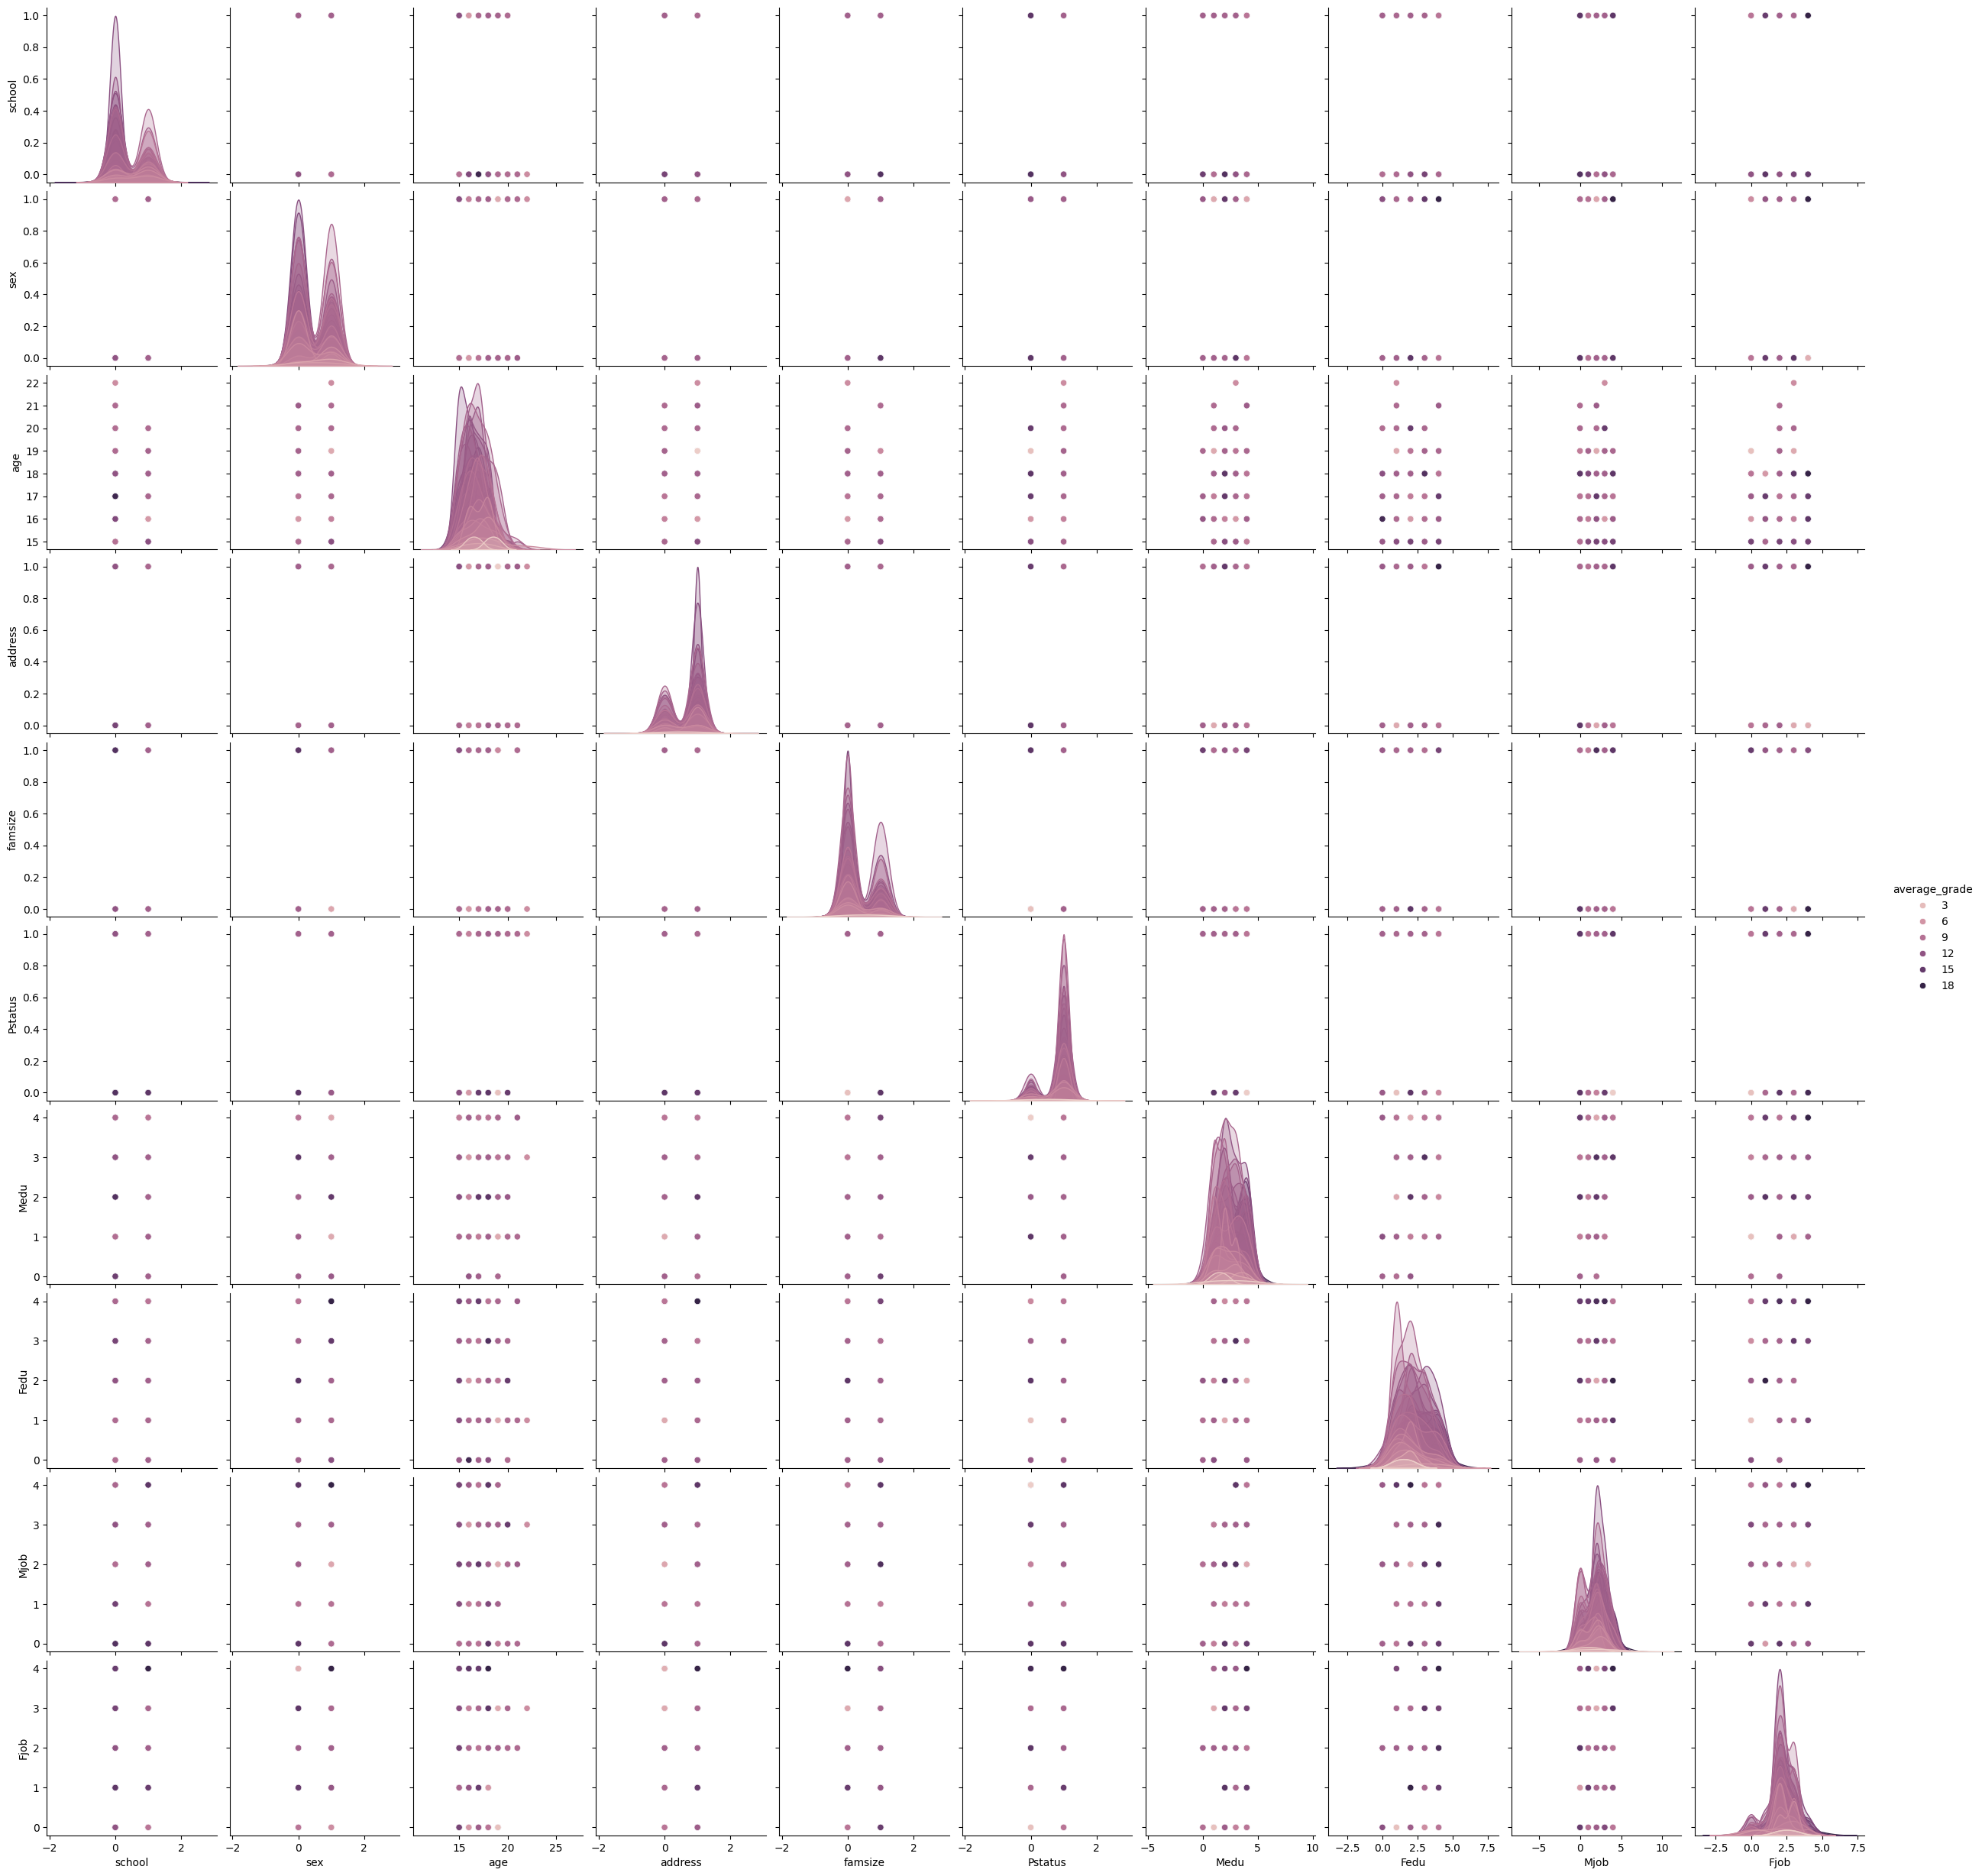

In [110]:
subsample = subsample1 
# Split the DataFrame columns by index, excluding 'average_grade'
vars_group1 = subsample.columns[:group1_end]
vars_group2 = subsample.columns[group1_end:group2_end]
vars_group3 = subsample.columns[group2_end:]

# Excluding 'average_grade' from groups if it's not meant to be part of them
vars_group1 = [col for col in vars_group1 if col != 'average_grade']
vars_group2 = [col for col in vars_group2 if col != 'average_grade']
vars_group3 = [col for col in vars_group3 if col != 'average_grade']

# Create the first pairplot with the first group of variables
pairplot1 = sns.pairplot(df[vars_group1 + ['average_grade']], hue='average_grade')
plt.show()

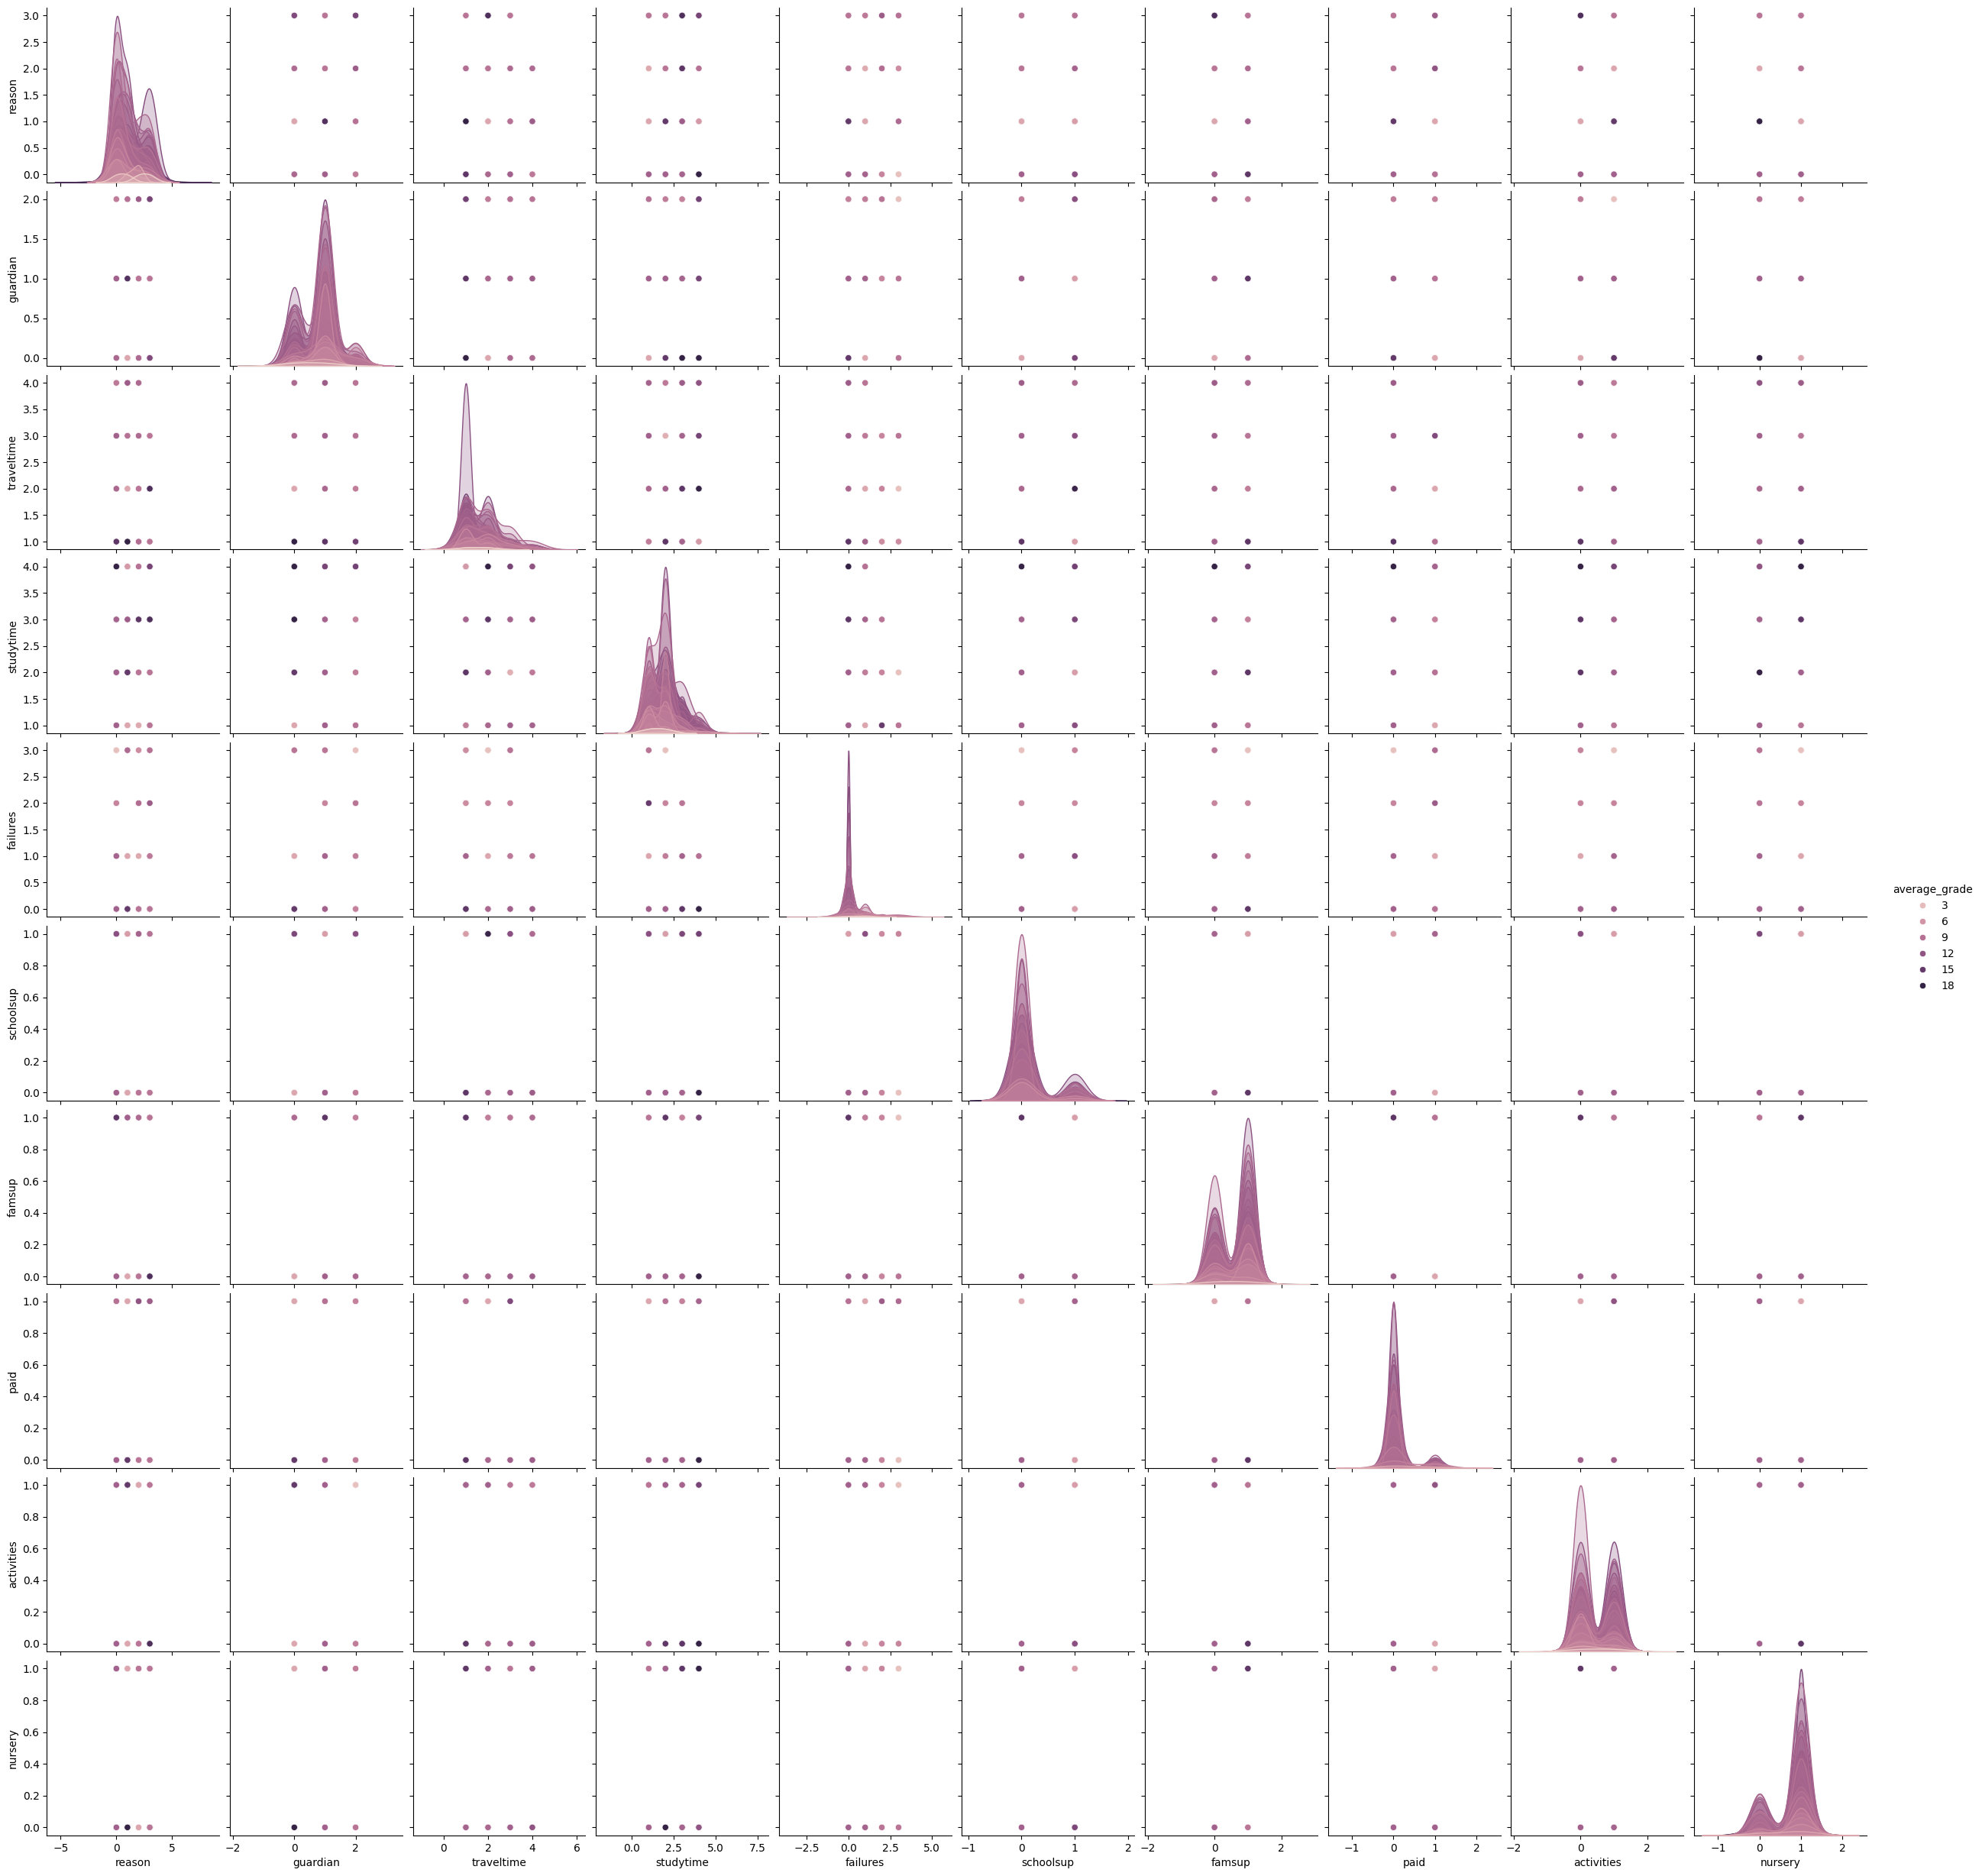

In [80]:
pairplot2 = sns.pairplot(df[vars_group2 + ['average_grade']], hue='average_grade')
plt.show()

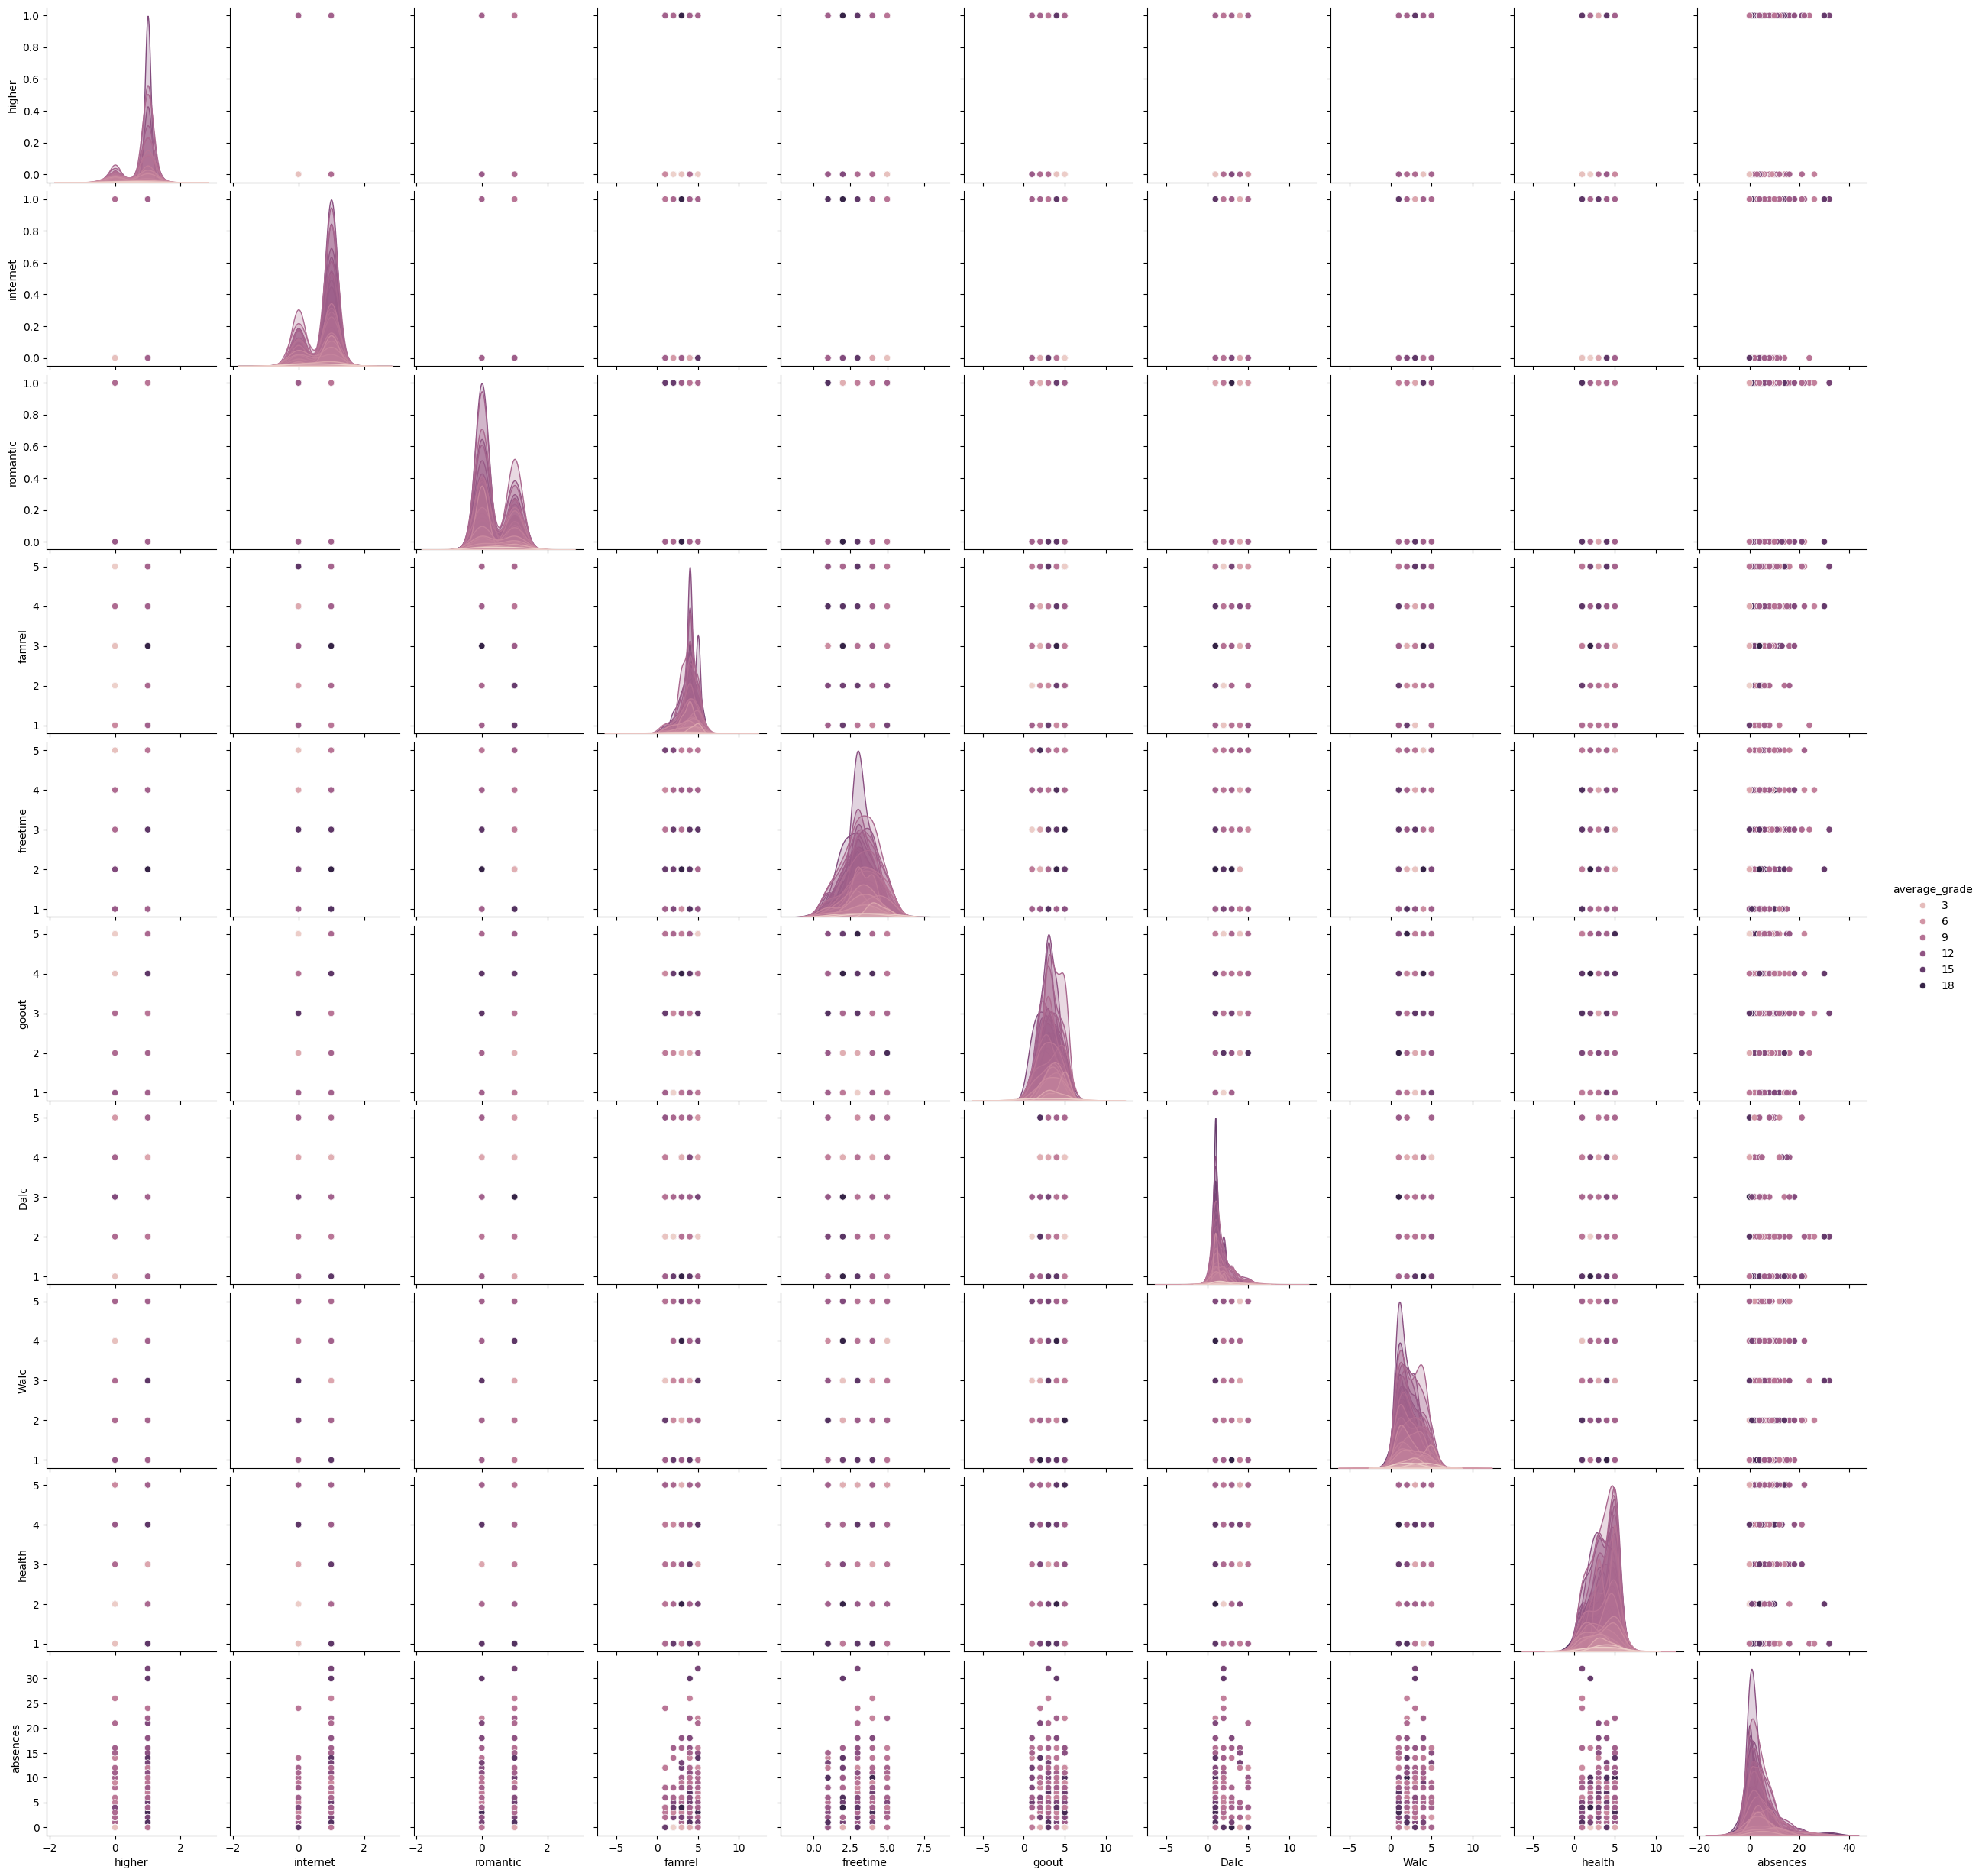

In [81]:
pairplot3 = sns.pairplot(df[vars_group3 + ['average_grade']], hue='average_grade')
plt.show()

### Subsample 10

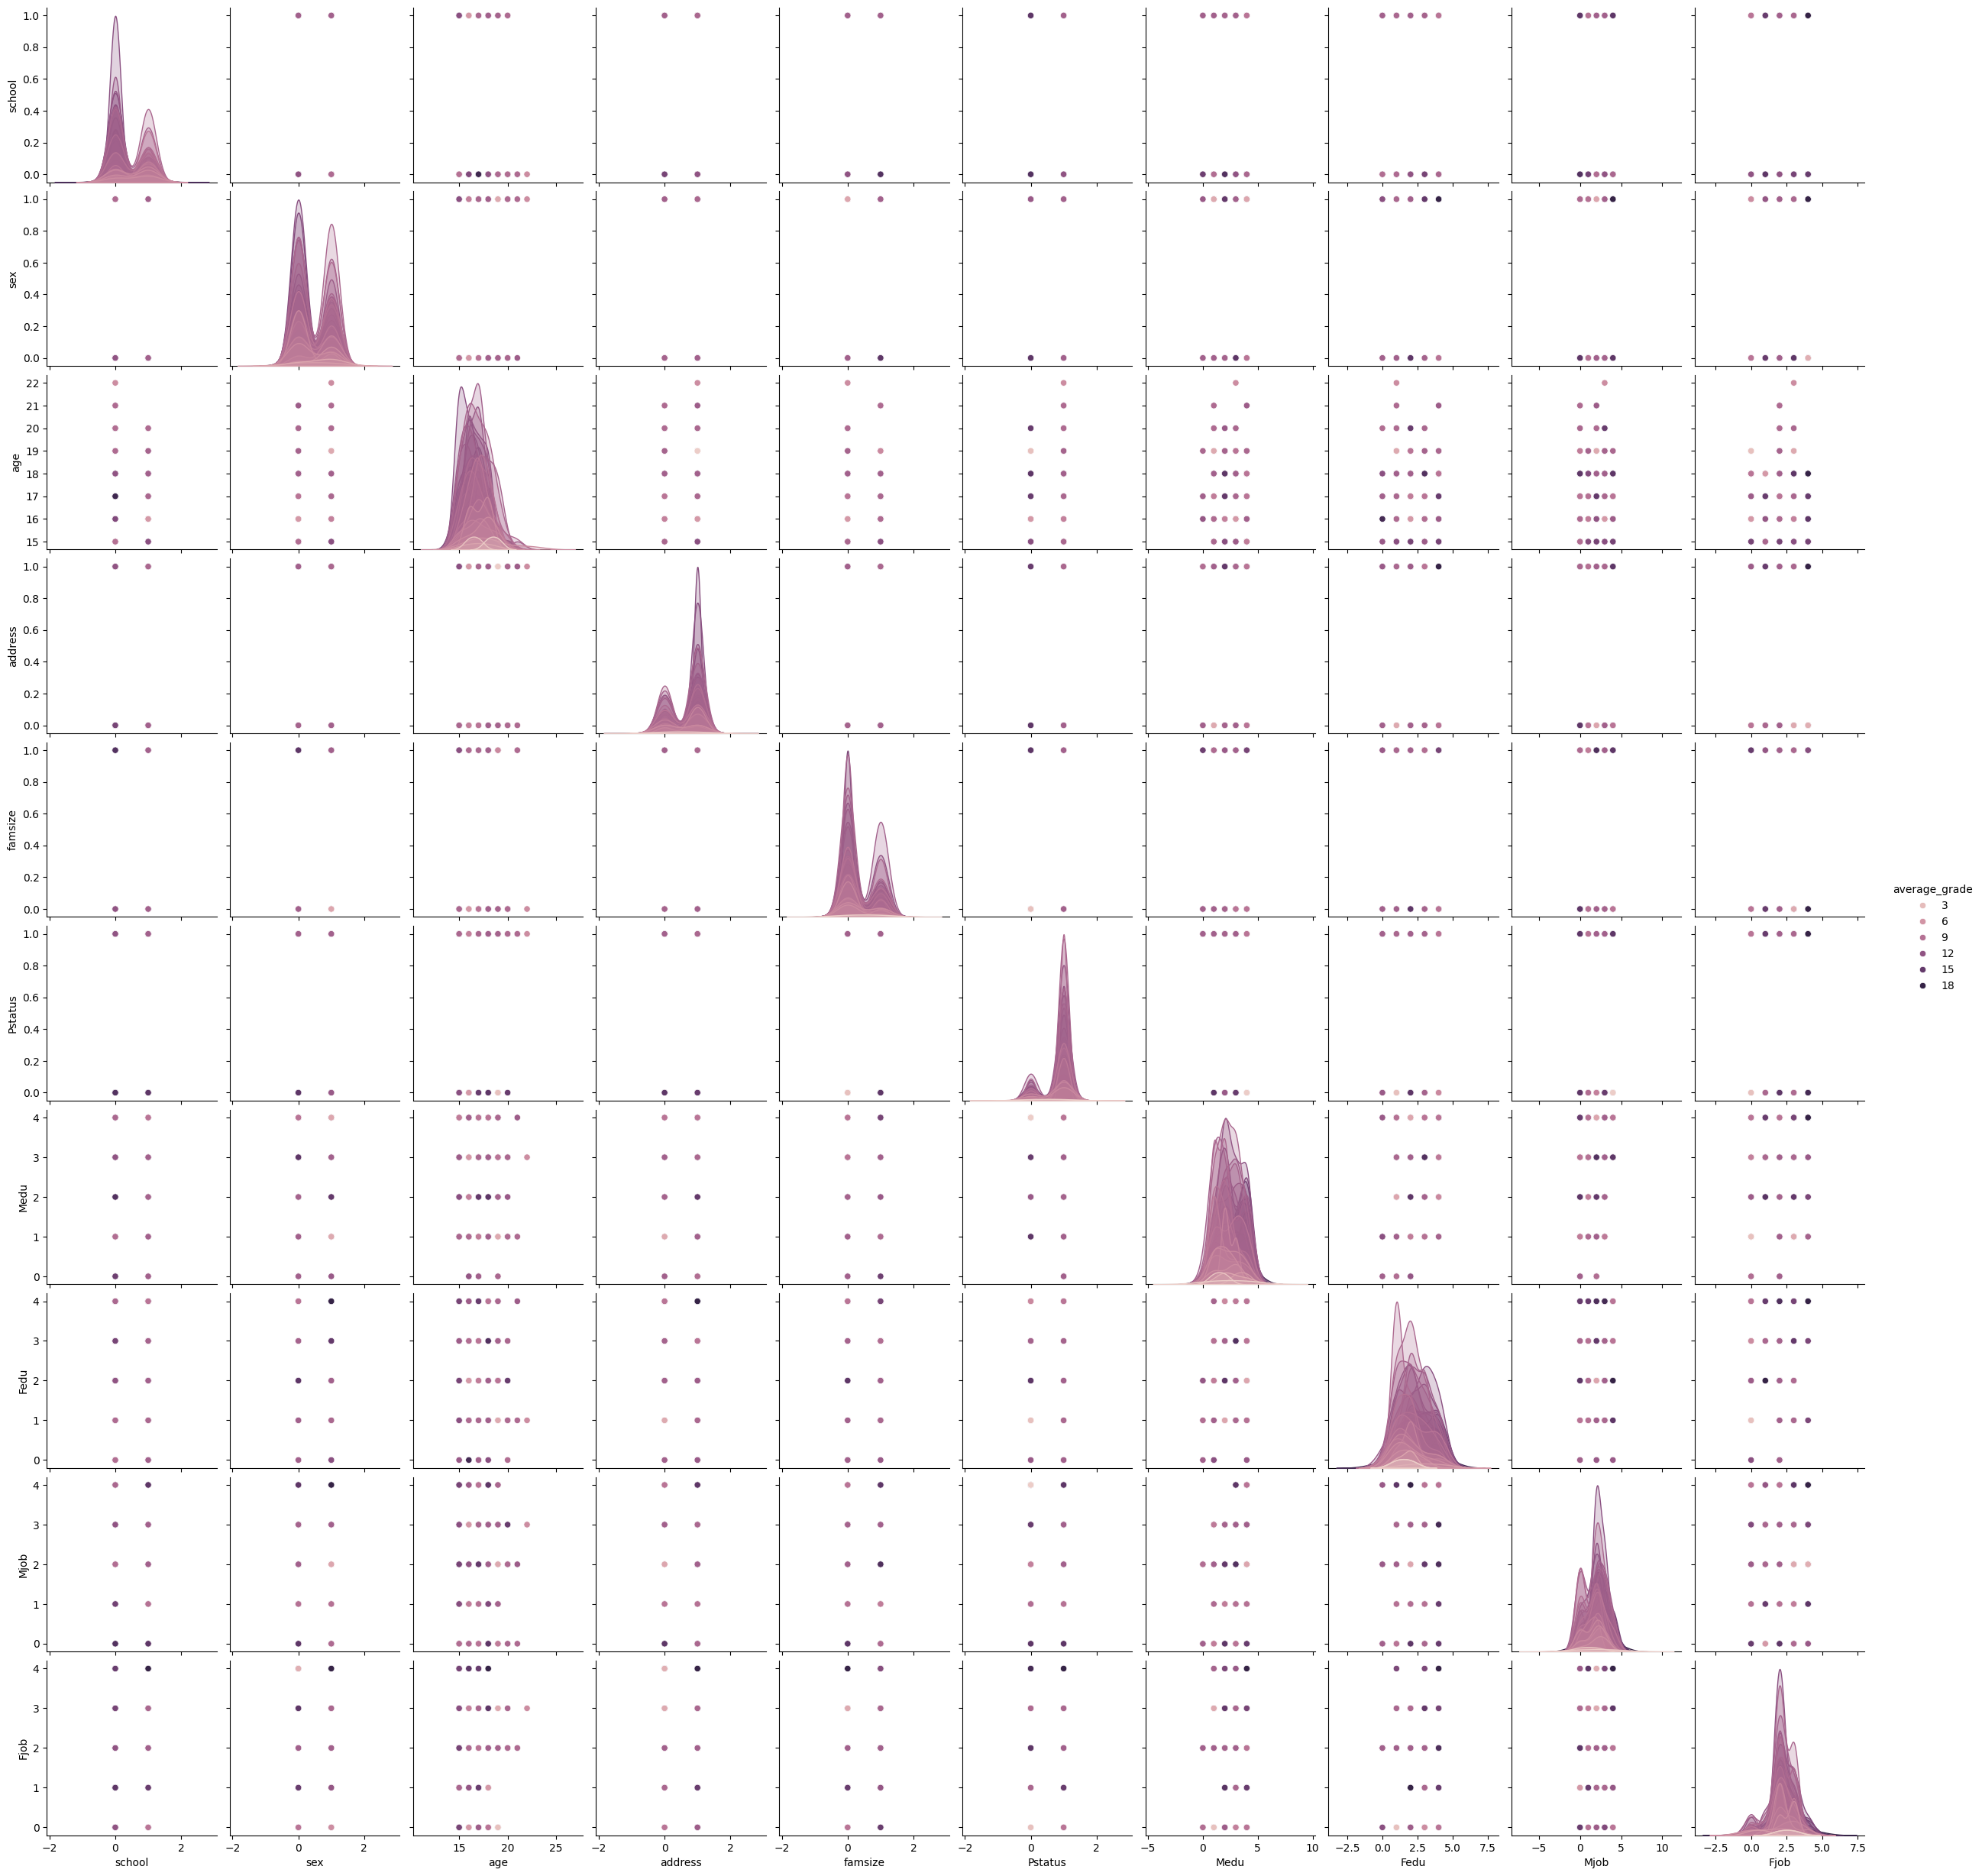

In [107]:
subsample = subsample10 
# Split the DataFrame columns by index, excluding 'average_grade'
vars_group1 = subsample.columns[:group1_end]
vars_group2 = subsample.columns[group1_end:group2_end]
vars_group3 = subsample.columns[group2_end:]

# Excluding 'average_grade' from groups if it's not meant to be part of them
vars_group1 = [col for col in vars_group1 if col != 'average_grade']
vars_group2 = [col for col in vars_group2 if col != 'average_grade']
vars_group3 = [col for col in vars_group3 if col != 'average_grade']

# Create the first pairplot with the first group of variables
pairplot1 = sns.pairplot(df[vars_group1 + ['average_grade']], hue='average_grade')
plt.show()

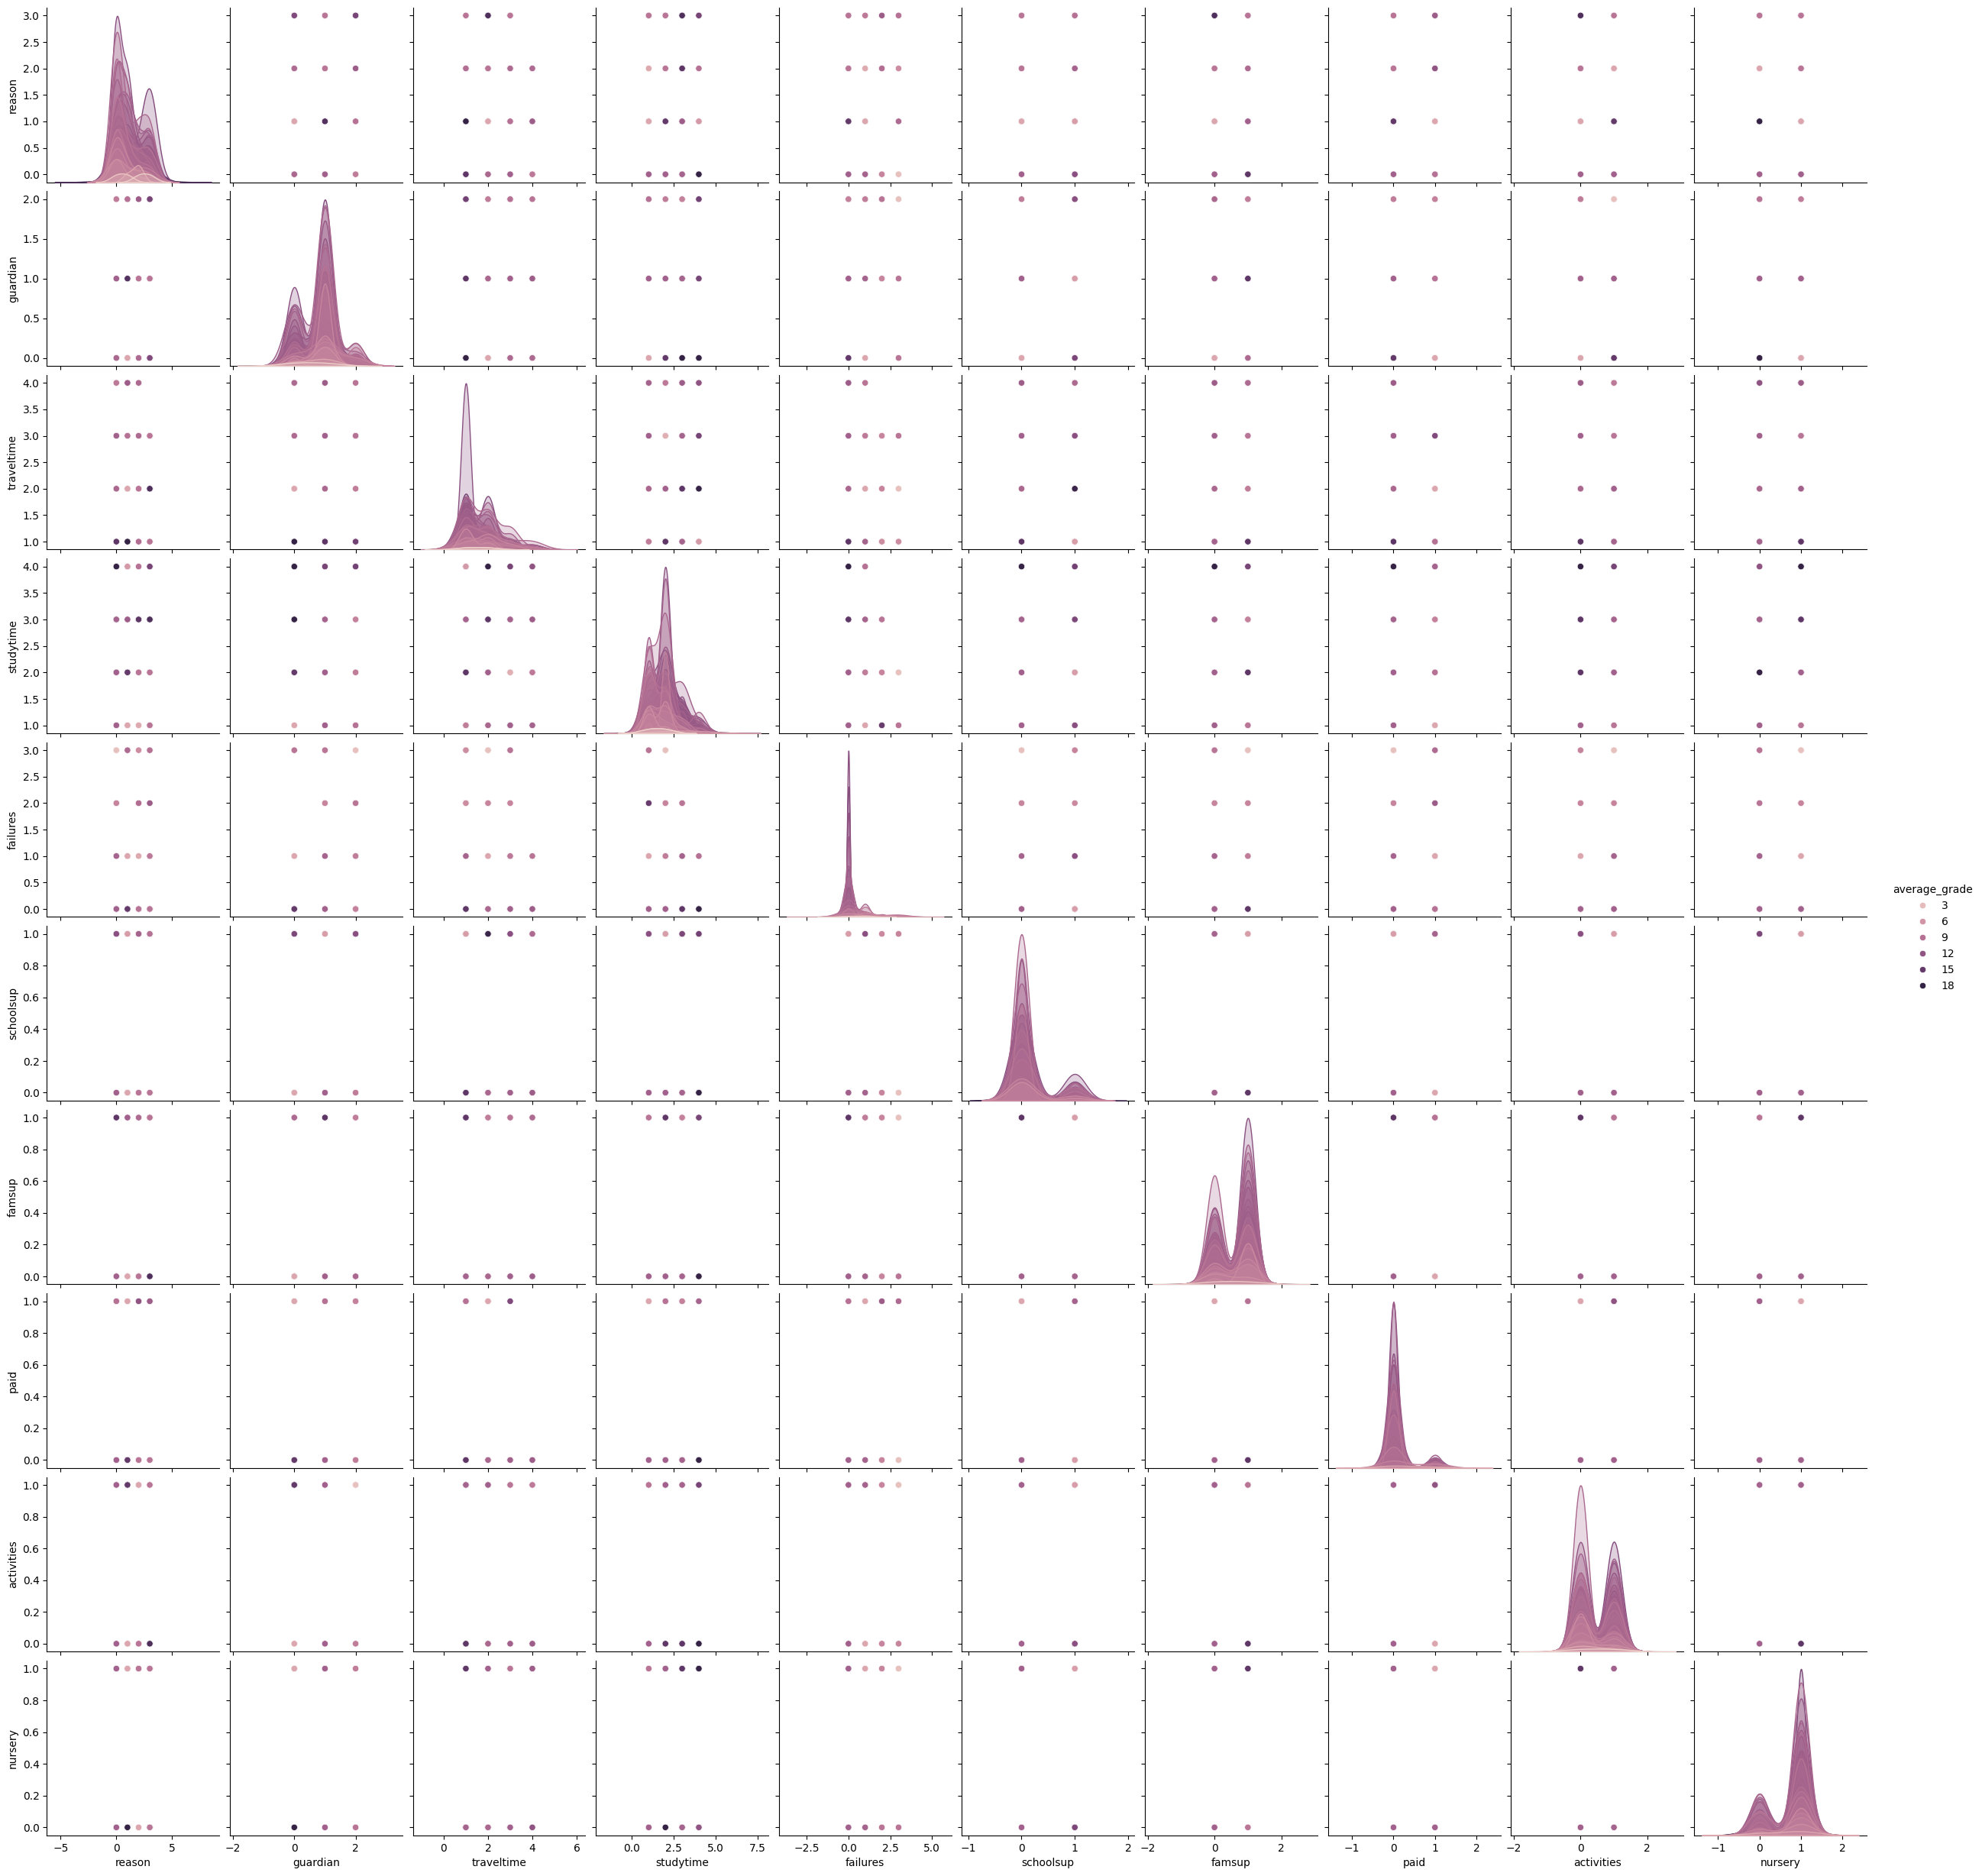

In [108]:
pairplot2 = sns.pairplot(df[vars_group2 + ['average_grade']], hue='average_grade')
plt.show()

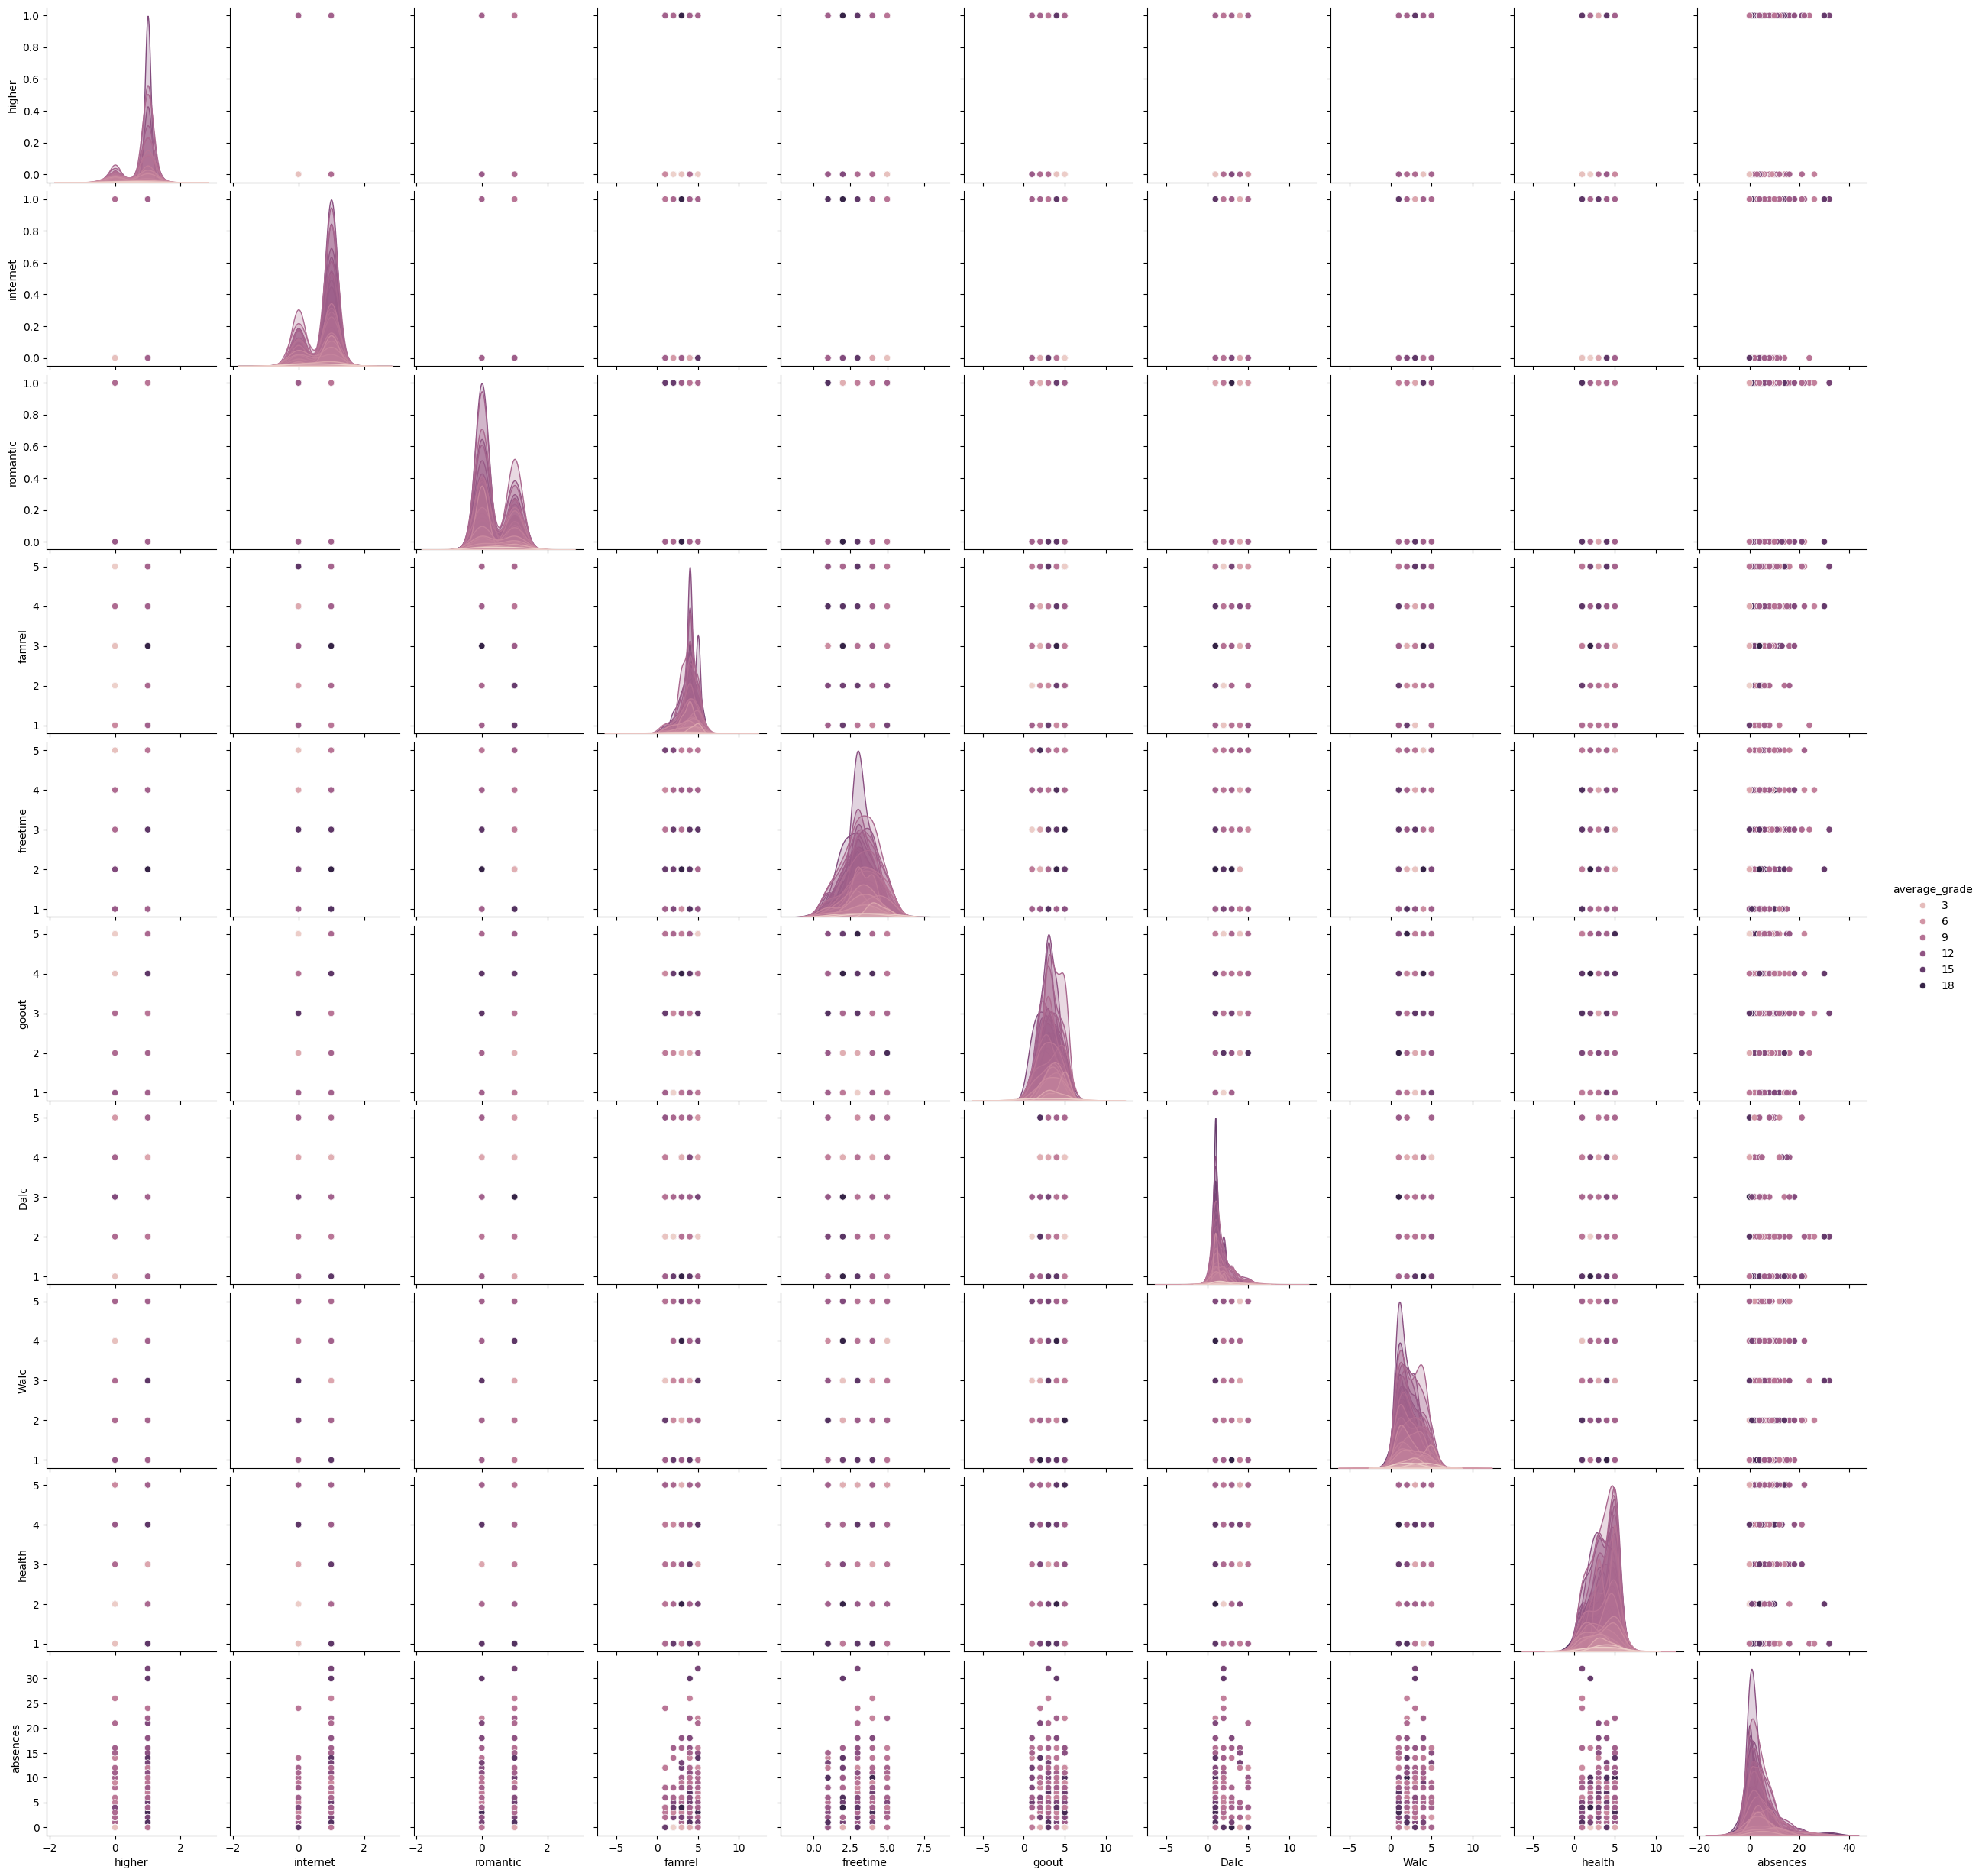

In [109]:
pairplot3 = sns.pairplot(df[vars_group3 + ['average_grade']], hue='average_grade')
plt.show()

# Cluster Map
Note: Focus on column 0,5,8,9,10,13,17, 20, 29, 30

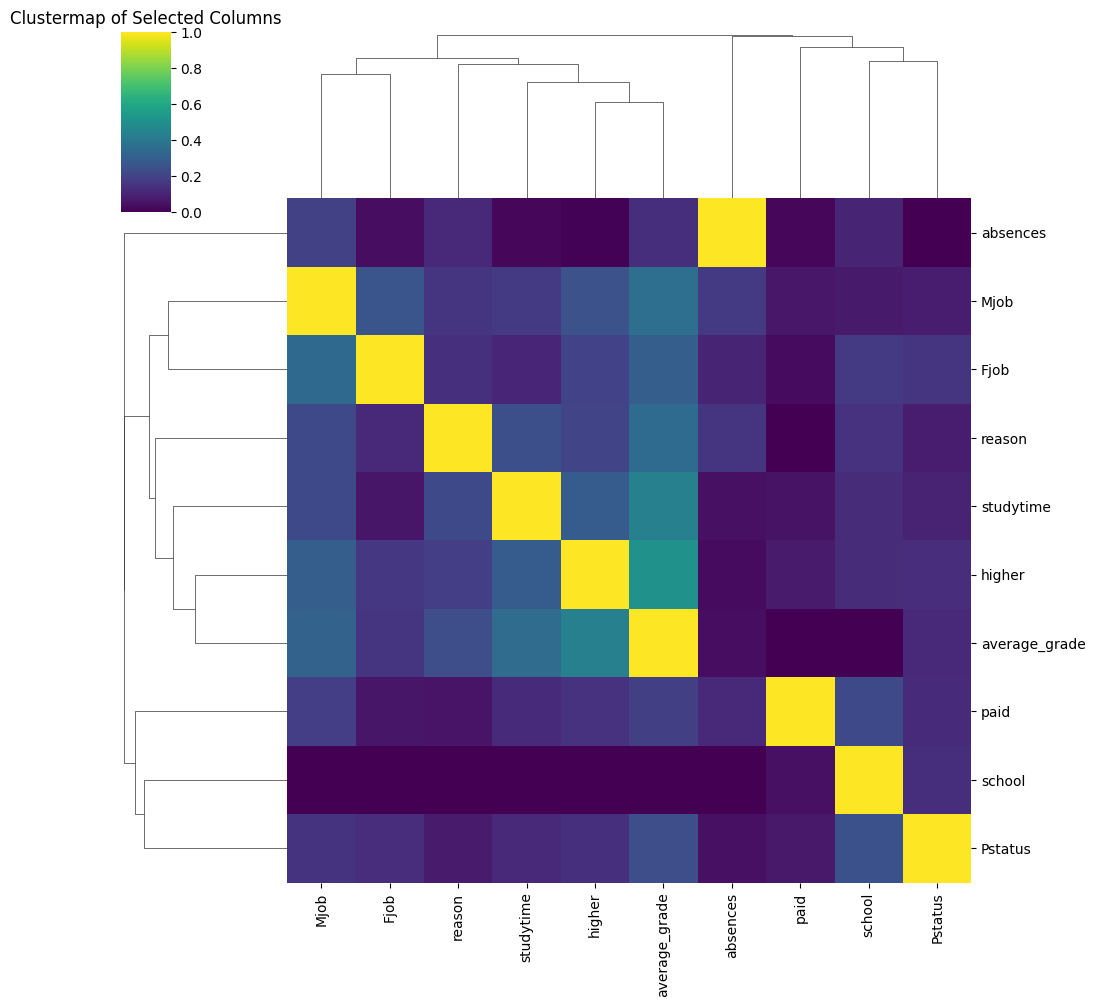

In [112]:
# Select only the specified columns
selected_columns = df.iloc[:, [0, 5, 8, 9, 10, 13, 17, 20, 29, 30]]

# Calculate the correlation matrix for the selected columns
corr_selected = selected_columns.corr()

# Create a clustermap from the correlation matrix of selected columns
sns.clustermap(corr_selected, method='average', metric='euclidean', cmap='viridis', standard_scale=1)
plt.title("Clustermap of Selected Columns")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train | Test Split

In [18]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'average_grade'],
      dtype='object')

In [19]:
X = df.drop('average_grade',axis=1)
y = df['average_grade']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# SVM Regression

In [23]:
from sklearn.svm import SVR,LinearSVR

In [24]:
base_model = SVR()

In [25]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [26]:
base_preds = base_model.predict(scaled_X_test)

## Evaluation

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
print("MAE = " + str(mean_absolute_error(y_test,base_preds)))
print("RMSE = " + str(np.sqrt(mean_squared_error(y_test,base_preds))))
print("Mean = " + str(y_test.mean()))

MAE = 1.799462820655082
RMSE = 2.3636299028210637
Mean = 11.74017094017094


# Grid Search in Attempt for Better Model

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1, 2, 3],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [31]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [32]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 3],
                         'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [33]:
grid.best_params_

{'C': 2, 'degree': 2, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [34]:
grid_preds = grid.predict(scaled_X_test)

In [35]:
print("MAE = " + str(mean_absolute_error(y_test,grid_preds)))

MAE = 1.7795019583134297


In [36]:
print("RMSE = " + str(np.sqrt(mean_squared_error(y_test,grid_preds))))


RMSE = 2.32497485795689


No big improvement, there needs to be adjustment and tuning on the parameter ranges